Objective:   
Take function 
$$ 
f = f(x,y,z,a) = e^{-a(x^{2}+y^{2}+z^{2})}
$$
Integrate $f$ over $x,y,z \in [0,1]$, show numerical result agrees with known analytic expression:
$$ 
I_{1}(a) = \int_{0}^{1} dx \int_{0}^{1} dy \int_{0}^{1} dz f(x,y,z,a) = (\frac{\pi}{4a})^{3/2} \text{Erf} (\sqrt{a})^3 
$$
Integrate it over a region depending on the variables being integrated:
$$ 
I_{2}(a) = \int_{0}^{1} dx \int_{0}^{1-x} dy \int_{0}^{1-x-y} dz f(x,y,z,a) 
$$
       








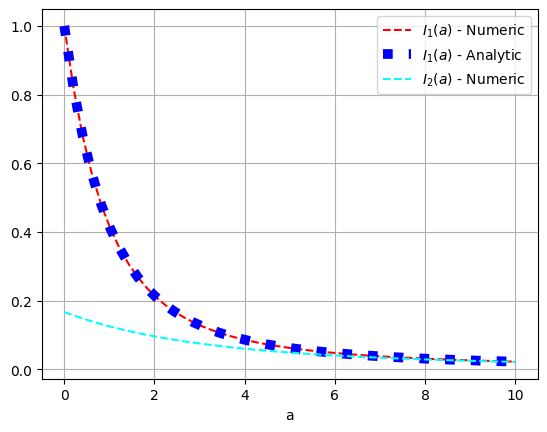

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import nquad 
from scipy.special import erf


def function(x,y,z,a):
    return np.exp(-a*((x**2)+(y**2)+(z**2)))

range_x = [0,1]
range_y = [0,1]
range_z = [0,1]

def I_1s(a):
    return nquad(function, [range_z,range_y,range_x], args=(a,)) #argument = parameter

I_1 = np.vectorize(I_1s) # numpy vectorize = takes array inputs and gives out arrays or tuple of arrays

def ans(a):
    const = (np.pi/(4*a))**(3/2)
    return const*erf(np.sqrt(a))**3

eps = 1.0e-6
avals = np.linspace(eps,10)

def range_zz(y,x,a):
    return [0,1-x-y]

def range_yy(x,a):
    return [0,1-x]

range_xx = [0,1]


def I_2s(a):
    return nquad(function, [range_zz, range_yy, range_xx], args=(a,))

I_2 = np.vectorize(I_2s)


plt.plot(avals, I_1(avals)[0], label = "$I_1(a)$ - Numeric", linestyle = "--", color = "red")
plt.plot(avals, ans(avals), label = "$I_1(a)$ - Analytic", linestyle = ":", color = "blue", linewidth = 7)
plt.plot(avals, I_2(avals)[0], label = "$I_2(a)$ - Numeric", linestyle = "--", color = "cyan")
plt.legend()
plt.grid()
plt.xlabel("a")
plt.show()




